## Exercise : merge/reshape

1) Diamonds dataset. The diamonds dataset  is included in the data folder of this session.

 - a) Plot price against volume (x*y*z).
 - b) The same plot as (a) but only for entries with `volume` >0 and <600.
 - c) Set point size=.5 and transparency=.5.
 - d) Colour data points per `cut`. You can use the `c` argument for colour. Note that this is done manually. Later with seaborn this will be handled automatically.
 - e) Add legned  with `plt.legend` for the cut and the corresponding colours. (advanced, optional)
 - f) Set labels and title

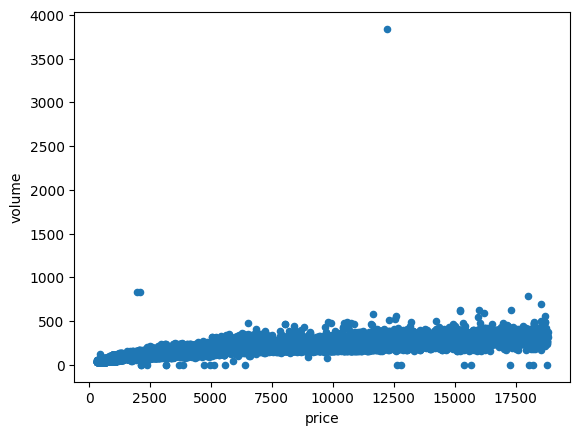

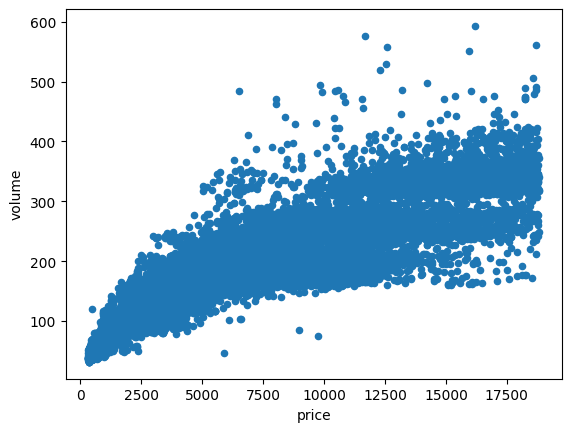

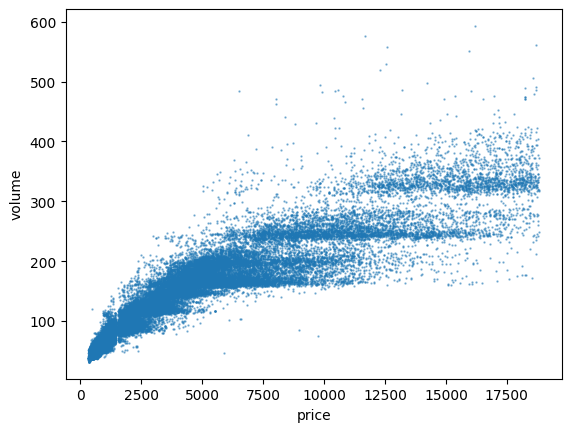

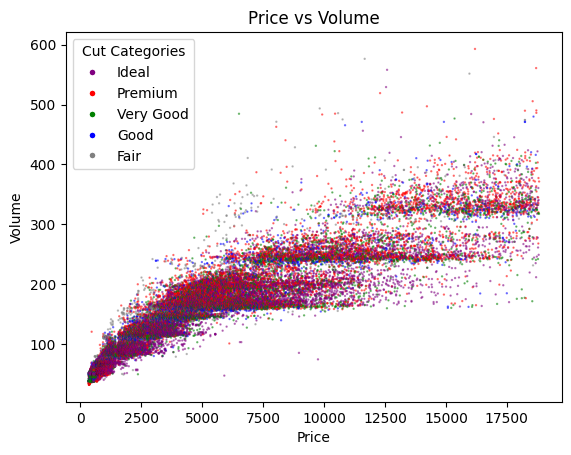

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
diamonds = pd.read_csv("data/diamonds.csv")


# a) Plot price against volume
diamonds['volume'] = diamonds[['x', 'y', 'z']].prod(axis=1)
diamonds.plot(x="price", y="volume", kind="scatter");

# b) filter volume: >0 & <600
diamonds_clean = diamonds[(diamonds.volume>0) & (diamonds.volume < 600)].copy()
diamonds_clean.plot(x="price", y="volume", kind="scatter");

# c) Set point size=.5 and transparency=.5
diamonds_clean.plot(x="price", y="volume", kind="scatter", s=.5, alpha=.5);

# d) Colour dots per `cut. You can use the `c` argument for colour. Note that this is done manually. Later with seaborn this will be handled automatically.

#diamonds_clean['colour'] = (
colour_map = {'Ideal': 'purple', 'Premium': 'red', 'Very Good': 'green', 'Good': 'blue', 'Fair': 'grey'}
diamonds_clean['colour'] = diamonds_clean.cut.copy().astype('category').cat.rename_categories(colour_map)
diamonds_clean.plot(x="price", y="volume", kind="scatter", s=.5, alpha=.5, c=diamonds_clean.colour)

# e) Add legned  with `plt.legend` for the cut and the corresponding colours. (optional)

handles = [
    plt.Line2D(
        [0], [0], marker='o', color='w', markerfacecolor=color, markersize=5, label=cut
    )
    for cut, color in colour_map.items()
]

plt.legend(handles=handles, title="Cut Categories", loc="upper left");

#5) Set labels and title

plt.xlabel("Price")
plt.ylabel("Volume")
plt.title("Price vs Volume");

## Exercises : data visualisation

In the exercises on `pandas` we used the *Natural gas consumption in the Netherlands* dataset [CBS Open data StatLine](https://opendata.cbs.nl/statline/portal.html?_la=en&_catalog=CBS).  We will continue with the same dataset here for visualisation. We repeat the solution for the last exercise to include the `term` and `date` in our dataframe, but now all other columns of the data are also included. Some missing values are represented as `'       .'`, replace these with np.nan.


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar


def to_ts(s):
    """
    Apply the following timestamp format for each term {JJ,KW,MM}:

    JJ : yyyyJJ00 => 31-12-yyyy
    KW : yyyyKWdd => 01: 1-1-yyyy to 31-3-yyyy
                     02: 1-4-yyyy to 30-6-yyyy
                     03: 1-7-yyyy to 30-9-yyyy
                     04: 1-10-yyyy to 31-12-yyyy
    MM : yyyyMMdd => 1-xx-yyyy

    :param format_:
    :param s: {year,term,idx}
    :return: Timestamp
    """
    year_, term, idx = s

    #
    # import sys
    # sys.version

    if term == 'JJ':
        day_, month_ = 31, 12
        return pd.Timestamp(year=year_, month=month_, day=day_)
    elif term == 'KW':
        day_, month_ = [(31,3),(30,6),(30,9),(31,12)][idx-1]
        return pd.Timestamp(year=year_, month=month_, day=day_)
    elif term == 'MM':
        day_, month_ = pd.Timestamp(year=year_, month=idx, day=1).days_in_month, idx
        return pd.Timestamp(year=year_, month=month_, day=day_)
    else:
        raise Exception('invalid tag, valid tags:  {JJ, KW, MM} !')
#
# _main_
#

cbs = pd.read_csv("/Users/zakriazafar/Documents/S&D - jaar 1/semester 2/block 2/essentials for data science/EfDS_cloned/08_dv/data/00372eng_UntypedDataSet_16032025_171431.csv",sep=";")
df = cbs[['Periods']].copy()
df = df.Periods.str.split(r'(JJ|MM|KW)', regex=True, expand=True)      # Split 'Period' into {year,term,index}.
df = pd.DataFrame({'year': df[0].astype(int),                          # Create DataFrame {year,term,idx} with
                   'term': df[1],                                      # the correct type.
                   'idx' : df[2].astype(int)})
df['date'] = [to_ts(s) for _,s in df.iterrows()]                        # create the date variable
ngc  = pd.concat([cbs.iloc[:,0],df, cbs.iloc[:,2:]],axis=1)            # include all columns, except {Periods},

#
# Replace '       .' with np.nan and convert the object types to float
#
nan_ = '       .'
ngc = ngc.replace(nan_, np.nan)   # those are replaced with {term,date, consumption}
cols = ngc.select_dtypes(include=['object']).columns[1:]
for col in cols:
    ngc[col] = ngc[col].astype('float')

## Line plots

1. Plot lines:

- a) Plot yearly `TotalSupply_1` against `date`.
- b) Draw a horizontal line to mark `TotalSupply_1` at the point where `TotalSupply_1` is just below to the latest observation.
- c) Repeat (b) by taking the 2021 as the latest observation.

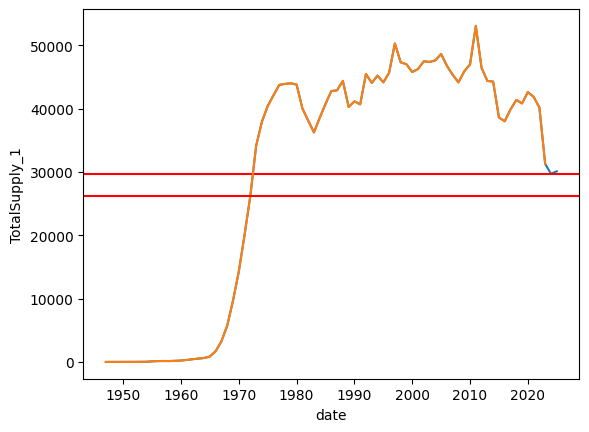

In [7]:
# a)
df = ngc.loc[ngc.term=='JJ']
ax = sns.lineplot(data=df, x='date',y='TotalSupply_1')
# b)
latest_supply = df.loc[df.date == df.date.max()]['TotalSupply_1'].item()  # TotalSupply_1 on latest date
previous_date = df.loc[df.TotalSupply_1 < latest_supply].date.max()       # last date where  TotalSupply_1 <  latest_supply
supply_prev_date = df[df.date==previous_date].TotalSupply_1.item()    
supply_prev_date# TotalSupply_1 on previous_date
ax.axhline(supply_prev_date, color='red');
# c)
df = df[df.date.dt.year <= 2022]                                          #  filter out dates later than 2021
latest_supply = df.loc[df.date == df.date.max()]['TotalSupply_1'].item()  # TotalSupply_1 on latest date
previous_date = df.loc[df.TotalSupply_1 < latest_supply].date.max()      # last date where  TotalSupply_1 <  latest_supply
supply_prev_date = df[df.date==previous_date].TotalSupply_1.item()        # TotalSupply_1 on previous_date
ax = sns.lineplot(data=df, x='date',y='TotalSupply_1')
ax.axhline(supply_prev_date, color='red');

2. The import/export variables are those with names starting with `Import` and `Export`. Plot Import/Export  against `date` for all import/export variables (Hint: reshape data). Make sure the legend is correctly placed. Set X and Y axis labels to `Year` (JJ) and `Natural gas (MCM)` respectively and set legend's label to `Import/Export`.


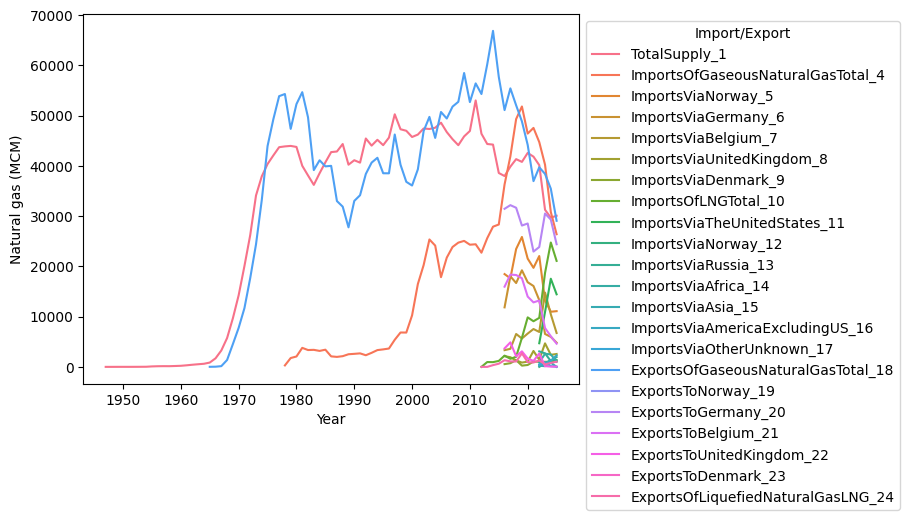

In [12]:
ngc_ie = ngc[ngc.columns[ngc.columns.str.match("(Import|Export|TotalSupply_1|date|term)")]]
ngc_ie_long = ngc_ie.melt(id_vars=ngc.columns[ngc.columns.str.match("(date|term)")],
                       value_vars=ngc.columns[ngc.columns.str.match("(Import|Export|TotalSupply_1)")],var_name="target", value_name="value")
ngc_ie_long = ngc_ie_long[ngc_ie_long.term =="JJ"]

ax = sns.lineplot(data=ngc_ie_long,x="date",y="value",hue="target")
plt.legend(bbox_to_anchor=(1, 1),title="Import/Export")  # see also sb.move_legend
ax.set_xlabel("Year")
ax.set_ylabel("Natural gas (MCM)");

In [ ]:
ngc_ie_long.target.unique()


3. Plot (point and lines) `TotalSupply_1` against `month` of all time. Note that you will need to summarise (use groupby/sum) on months of the entire dataset (MM only). Set X and Y axis labels to `Month` and `Natural gas (MCM)` respectively. Set `Month` axis ticks to represent month abbreviations. Hint: use calendar module to get month abbreviations.

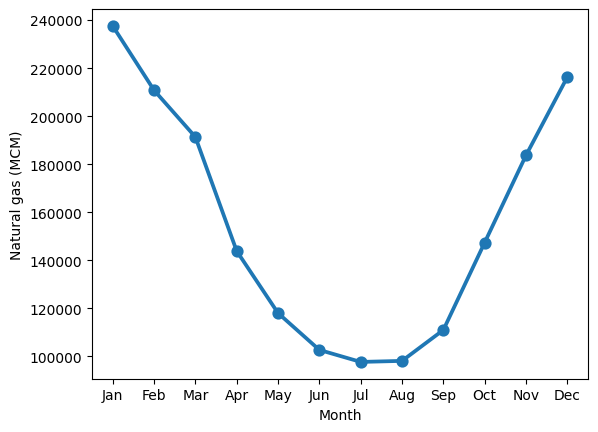

In [13]:
ngc_import_export = ngc[ngc.columns[ngc.columns.str.match("(date|TotalSupply_1|term)")]]
df = ngc_import_export[ngc_import_export.term=="MM"]
df = df.groupby(df.date.dt.month)['TotalSupply_1'].sum().reset_index()
df = df.assign(month = [calendar.month_abbr[i] for i in df.date])
ax = sns.pointplot(data=df,x='month',y='TotalSupply_1')
ax.set_xlabel("Month")
ax.set_ylabel("Natural gas (MCM)");

4. Plot boxplots of `TotalSupply_1` against `month` of all time. Set X and Y axis labels to `Month` and `Natural gas (MCM)` respectively. Set `Month` axis ticks to represent month abbreviations.

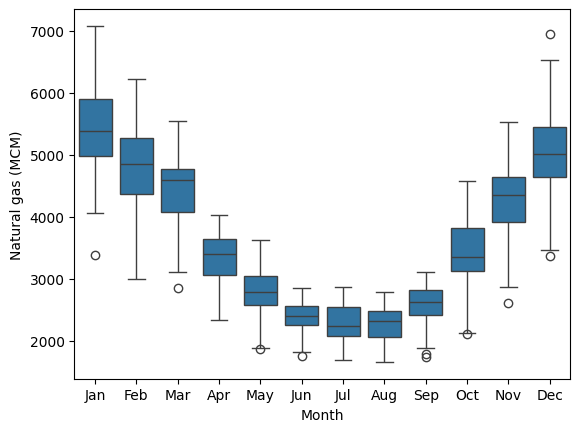

In [14]:
ngc_import_export = ngc[ngc.columns[ngc.columns.str.match("(date|TotalSupply_1|term)")]]
df = ngc_import_export[ngc_import_export.term=="MM"]
df = df.assign(month = [calendar.month_abbr[i] for i in df.date.dt.month])
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df.month = df.month.astype('category').cat.reorder_categories(list(calendar.month_abbr)[1:])
ax = sns.boxplot(data=df,x='month',y='TotalSupply_1')
ax.set_xlabel("Month")
ax.set_ylabel("Natural gas (MCM)");

5) Boxplots of import/export variables on year (JJ) basis in log10 scale. Set X and Y axis labels to `Natural gas (MCM)` and `Import/Export` respectively.


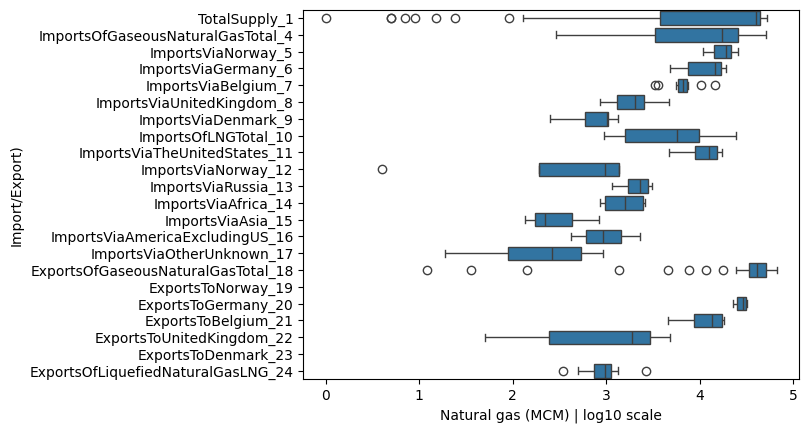

In [ ]:
ngc_ie = ngc[ngc.columns[ngc.columns.str.match("(Import|Export|TotalSupply_1|date|term)")]]
ngc_ie_long = ngc_ie.melt(id_vars=ngc.columns[ngc.columns.str.match("(date|term)")],
                          value_vars=ngc.columns[ngc.columns.str.match("(Import|Export|TotalSupply_1)")],var_name="target", value_name="value")
ngc_ie_long = ngc_ie_long[ngc_ie_long.term =="JJ"]
ngc_ie_long
['value'] = np.log10(ngc_ie_long['value'].replace(0,np.nan))  # log10 ; replace 0 with nan to suppress log100 error on 0
ax = sns.boxplot(data=ngc_ie_long, x='value', y='target')
ax.set_xlabel("Natural gas (MCM) | log10 scale")
ax.set_ylabel("Import/Export)");

### Quiz

Implement `sns.ecdfplot` by calculating [ecdf](https://en.wikipedia.org/wiki/Empirical_distribution_function) and plotting using `sns.lineplot`.

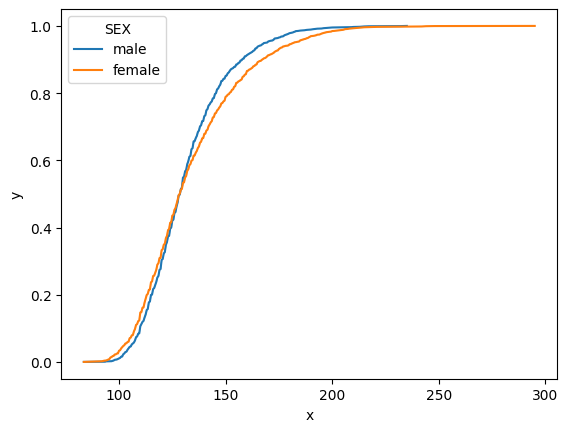

In [16]:
# lineplot (eCDF)
import seaborn as sns
import pandas as pd
fmh = pd.read_csv("data/framingham.csv")
fmh['SEX'] = fmh.SEX.astype('category').cat.rename_categories(['male', 'female'])

# ecdf
df = pd.DataFrame([(v,(v >= fmh[fmh.SEX==sex].SYSBP).sum()/fmh[fmh.SEX==sex].SYSBP.size) for v,sex in zip(fmh.SYSBP,fmh.SEX)], columns=['x','y'])
# include SEX variable
df = pd.concat([df, fmh.SEX], axis=1)
df.sort_values('x',inplace=True)
sns.lineplot(df, x='x',y='y', hue='SEX');